Palyginti 2014m ir 2019m gyventojų sveikatos statistinio tyrimo duomenis apie gyventojų KMI, aktyvumo laiką ir KMI pagal amžiaus grupes. Atvaizduoti prognozę, kokie būtų galimi rodikliai 2024 metų, remiantis 2014-2019 tyrimais.
Tyrimo duomenys :
https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/d7eb3a56a4924b2192c9258a38c92b26_0/about    (2014)
https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/26d03b90d0db4a1190279c58917b1dea_0/explore    (2019)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import mysql.connector as cnt

In [3]:
DB = cnt.connect(
    host = 'localhost',
    port = 3317,
    user = 'root',
    password = 'Diwersule123'
)

c = DB.cursor()
c.execute('use statistika')


In [4]:
 # KMI 2019 skaiciavimas
sql = '''select sex, ROUND(avg(`BMI`), 2) AS 'AVG BMI'
from (select sex, age, bm1, bm2, pe7, ROUND(bm2 / POWER(bm1 / 100, 2), 3) AS 'BMI'
from `2019`
having `BMI` > 0 and `pe7`> 0 ) AS lent
group by sex;'''
c.execute(sql)
#  vidutinis vyru KMI
ats = c.fetchall()
lytis = []
VKMI2019 = []
MKMI2019 = []
for eil in ats:
    if eil[0] == 1 :
        VKMI2019.append(float(eil[1]))
    elif eil[0] == 2 :
        MKMI2019.append(float(eil[1]))
    if eil[1] not in lytis: # jeigu tokio iraso nera kategorijoje, ja prideda, jei jau yra, nebekartoja
        lytis.append(eil[0])
    
print(VKMI2019)
print(MKMI2019)
print(lytis)

[24.99]
[24.89]
[1, 2]


In [5]:
# aktyvumo 2019 skaiciavimas
sql='''select sex, ROUND(avg(`pe7`), 0) AS 'AVG activity(min)'
from (select sex, age, bm1, bm2, pe7, ROUND(bm2 / POWER(bm1 / 100, 2), 3) AS 'BMI'
from `2019`
having `BMI` > 0 and `pe7`> 0) AS lent
group by sex;'''
c.execute(sql)
ats = c.fetchall()

Vmin2019 = []
Mmin2019 = []
for eil in ats:
    if eil[0] == 1 :
        Vmin2019.append(float(eil[1]))
    elif eil[0] == 2 :
        Mmin2019.append(float(eil[1]))
    
print(Vmin2019)
print(Mmin2019)
print(lytis)


[347.0]
[266.0]
[1, 2]


In [6]:
 # KMI 2014 skaiciavimas
sql = '''select sex, ROUND(avg(`BMI`), 2) AS 'AVG BMI'
from (select sex, age, bm1, bm2, pe7, ROUND(bm2 / POWER(bm1 / 100, 2), 3) AS 'BMI'
from `2014`
having `BMI` > 0 and `pe7`> 0 ) AS lent
group by sex;'''
c.execute(sql)
#  vidutinis KMI
ats = c.fetchall()

VKMI2014 = []
MKMI2014 = []
for eil in ats:
    if eil[0] == 1 :
        VKMI2014.append(float(eil[1]))
    elif eil[0] == 2 :
        MKMI2014.append(float(eil[1]))
    
print(VKMI2014)
print(MKMI2014)


[24.54]
[24.3]


In [7]:
# aktyvumo 2014 skaiciavimas
sql='''select sex, ROUND(avg(`pe7`), 0) AS 'AVG activity(min)'
from (select sex, age, bm1, bm2, pe7, ROUND(bm2 / POWER(bm1 / 100, 2), 3) AS 'BMI'
from `2014`
having `BMI` > 0 and `pe7`> 0) AS lent
group by sex;'''
c.execute(sql)
ats = c.fetchall()
# aktyvumo laikas minutemis per savaite
Vmin2014 = []
Mmin2014 = []
for eil in ats:
    if eil[0] == 1 :
        Vmin2014.append(float(eil[1]))
    elif eil[0] == 2 :
        Mmin2014.append(float(eil[1]))
    
print(Vmin2014)
print(Mmin2014)
print(lytis)

[428.0]
[274.0]
[1, 2]


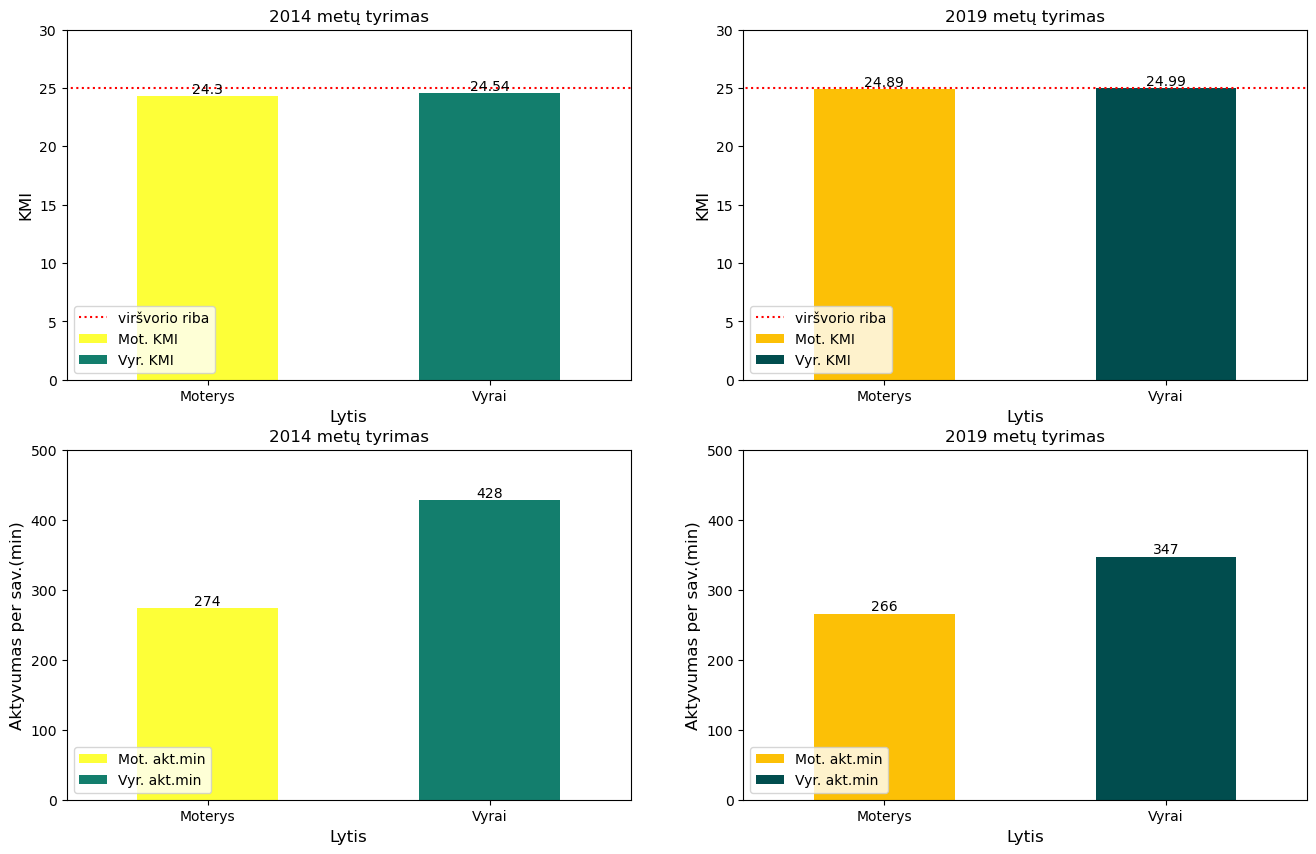

In [46]:
fig, asys = plt.subplots(2,2, figsize = (16,10))

w = 0.5

# pirmas grafikas
A = asys[0][0].bar(lytis[0], MKMI2014, width=w, label = 'Mot. KMI', color = 'xkcd:lemon yellow')
B = asys[0][0].bar(lytis[1], VKMI2014, width=w, label = 'Vyr. KMI', color = 'xkcd:blue green')
asys[0][0].bar_label(A)
asys[0][0].bar_label(B)

asys[0][0].plot([0,4], [25,25], c='red', ls=':', label = 'viršvorio riba')
asys[0][0].set_xlim(0.5, 2.5)

asys[0][0].set_xticks(lytis)
asys[0][0].set_xticklabels(['Moterys', 'Vyrai'])
asys[0][0].set_ylim(0,30)
asys[0][0].legend(loc=3)
asys[0][0].set_xlabel('Lytis', fontsize=12)
asys[0][0].set_ylabel('KMI', fontsize=12)
asys[0][0].set_title('2014 metų tyrimas', fontsize=12)
# antras grafikas
C = asys[0][1].bar(lytis[0], MKMI2019, width=w, label = 'Mot. KMI', color = 'xkcd:marigold')
D = asys[0][1].bar(lytis[1], VKMI2019, width=w, label = 'Vyr. KMI', color = 'xkcd:dark teal')
asys[0][1].bar_label(C)
asys[0][1].bar_label(D)

asys[0][1].plot([0,4], [25,25], c='red', ls=':', label = 'viršvorio riba')
asys[0][1].set_xlim(0.5, 2.5)

asys[0][1].set_xticks(lytis)
asys[0][1].set_xticklabels(['Moterys', 'Vyrai'])
asys[0][1].set_ylim(0,30)
asys[0][1].legend(loc=3)
asys[0][1].set_xlabel('Lytis', fontsize=12)
asys[0][1].set_ylabel('KMI', fontsize=12)
asys[0][1].set_title('2019 metų tyrimas', fontsize=12)
# trecias grafikas
E = asys[1][0].bar(lytis[0], Mmin2014, width=w, label = 'Mot. akt.min', color = 'xkcd:lemon yellow')
F = asys[1][0].bar(lytis[1], Vmin2014, width=w, label = 'Vyr. akt.min', color = 'xkcd:blue green')
asys[1][0].set_xticks(lytis)
asys[1][0].set_xticklabels(['Moterys', 'Vyrai'])
asys[1][0].bar_label(E)
asys[1][0].bar_label(F)
asys[1][0].legend(loc=3)
asys[1][0].set_ylim(0, 500)
asys[1][0].set_xlabel('Lytis', fontsize=12)
asys[1][0].set_ylabel('Aktyvumas per sav.(min)', fontsize=12)
asys[1][0].set_title('2014 metų tyrimas', fontsize=12)
asys[1][0].set_xlim(0.5, 2.5)

G = asys[1][1].bar(lytis[0], Mmin2019, width=w, label = 'Mot. akt.min', color = 'xkcd:marigold')
H = asys[1][1].bar(lytis[1], Vmin2019, width=w, label = 'Vyr. akt.min', color = 'xkcd:dark teal')
asys[1][1].set_xticks(lytis)
asys[1][1].set_xticklabels(['Moterys', 'Vyrai'])
asys[1][1].bar_label(G)
asys[1][1].bar_label(H)
asys[1][1].legend(loc=3)
asys[1][1].set_ylim(0, 500)
asys[1][1].set_xlabel('Lytis', fontsize=12)
asys[1][1].set_ylabel('Aktyvumas per sav.(min)', fontsize=12)
asys[1][1].set_title('2019 metų tyrimas', fontsize=12)
asys[1][1].set_xlim(0.5, 2.5)


plt.show()

In [9]:
print(lytis)

[1, 2]


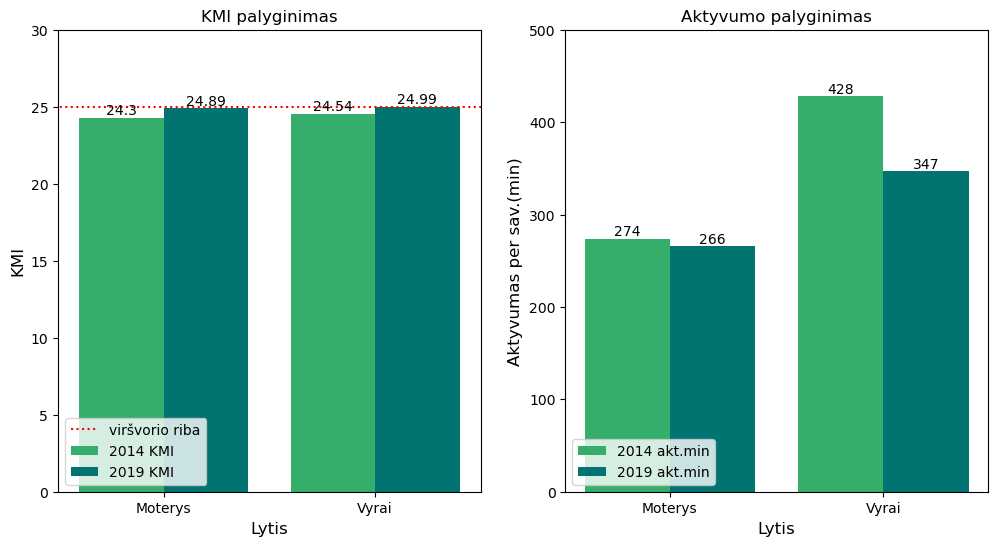

In [54]:
# palyginimas šalia

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))


w = 0.4
A = ax1.bar(lytis[0]-w/2, MKMI2014, width=w, label = '2014 KMI', color = 'xkcd:seaweed green')
B = ax1.bar(lytis[0]+w/2, MKMI2019, width=w, label = '2019 KMI', color = 'xkcd:dark aquamarine')
C = ax1.bar(lytis[1]-w/2, VKMI2014, width=w, color = 'xkcd:seaweed green')
D = ax1.bar(lytis[1]+w/2, VKMI2019, width=w, color = 'xkcd:dark aquamarine')
ax1.bar_label(A)
ax1.bar_label(B)
ax1.bar_label(C)
ax1.bar_label(D)
ax1.plot([0,4], [25,25], c='red', ls=':', label = 'viršvorio riba')
ax1.set_xlim(0.5, 2.5)

ax1.set_xticks(lytis)
ax1.set_xticklabels(['Moterys', 'Vyrai'])
ax1.set_ylim(0,30)
ax1.legend(loc=3)

E = ax2.bar(lytis[0]-w/2, Mmin2014, width=w, label = '2014 akt.min', color = 'xkcd:seaweed green')
F = ax2.bar(lytis[0]+w/2, Mmin2019, width=w, label = '2019 akt.min', color = 'xkcd:dark aquamarine')
G = ax2.bar(lytis[1]-w/2, Vmin2014, width=w, color = 'xkcd:seaweed green')
H = ax2.bar(lytis[1]+w/2, Vmin2019, width=w, color = 'xkcd:dark aquamarine')
ax2.set_xticks(lytis)
ax2.set_xticklabels(['Moterys', 'Vyrai'])
ax2.bar_label(E)
ax2.bar_label(F)
ax2.bar_label(G)
ax2.bar_label(H)
ax2.set_ylim(0,500)

ax1.set_xlabel('Lytis', fontsize=12)
ax1.set_ylabel('KMI', fontsize=12)
ax1.set_title('KMI palyginimas', fontsize=12)
ax2.set_xlabel('Lytis', fontsize=12)
ax2.set_ylabel('Aktyvumas per sav.(min)', fontsize=12)
ax2.set_title('Aktyvumo palyginimas', fontsize=12)


ax2.legend(loc=3)

Vyrai aktyvesni nei moterys.
Nors vyrų aktyvumo laikas krito ~19proc(lyginant su moterų ~3proc), vyrų KMI kilo lėčiau - ~1,8 proc (moterų ~2,4 proc).


In [11]:
# koeficientai
MkoefKMI = MKMI2019[0]/MKMI2014[0]
VkoefKMI = VKMI2019[0]/VKMI2014[0]

MkoefMIN = Mmin2019[0]/Mmin2014[0]
VkoefMIN = Vmin2019[0]/Vmin2014[0]

print(MkoefKMI, VkoefKMI, MkoefMIN, VkoefMIN)

1.0242798353909466 1.0183374083129584 0.9708029197080292 0.8107476635514018


In [12]:
# 2024 prognozė

MKMI2024 = MKMI2019[0]*MkoefKMI
VKMI2024 = VKMI2019[0]*VkoefKMI

Mmin2024 = Mmin2019[0]*MkoefMIN
Vmin2024 = Vmin2019[0]*VkoefMIN

print(MKMI2024, VKMI2024, Mmin2024, Vmin2024)

25.494325102880662 25.44825183374083 258.2335766423358 281.32943925233644


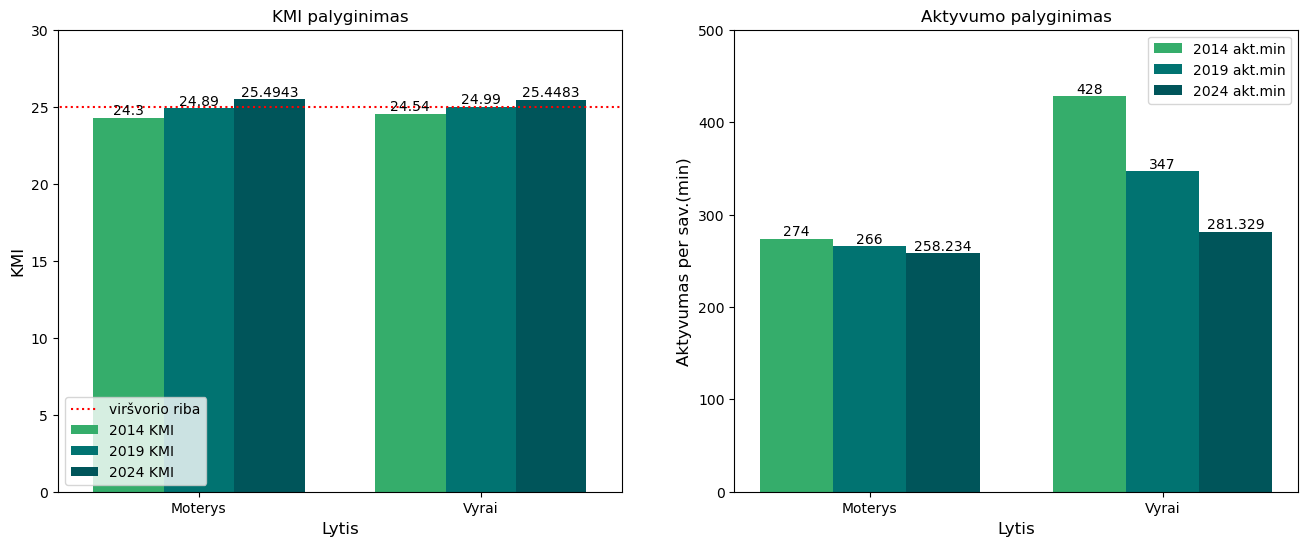

In [57]:
# su 2024 prognoze nesiimant veiksmų



fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,6))


w = 0.25
A = ax1.bar(lytis[0]-w, MKMI2014, width=w, color = 'xkcd:seaweed green', label = '2014 KMI')
B = ax1.bar(lytis[0], MKMI2019, width=w, color = 'xkcd:dark aquamarine', label = '2019 KMI')
N = ax1.bar(lytis[0]+w, MKMI2024, width=w, color = 'xkcd:deep teal', label = '2024 KMI')
C = ax1.bar(lytis[1]-w, VKMI2014, width=w, color = 'xkcd:seaweed green')
D = ax1.bar(lytis[1], VKMI2019, width=w, color = 'xkcd:dark aquamarine')
M = ax1.bar(lytis[1]+w, VKMI2024, width=w, color = 'xkcd:deep teal')
ax1.bar_label(A)
ax1.bar_label(B)
ax1.bar_label(N)
ax1.bar_label(C)
ax1.bar_label(D)
ax1.bar_label(M)

ax1.plot([0,4], [25,25], c='red', ls=':', label = 'viršvorio riba')
ax1.set_xlim(0.5, 2.5)

ax1.set_xticks(lytis)
ax1.set_xticklabels(['Moterys', 'Vyrai'])
ax1.set_ylim(0,30)
ax1.legend(loc=3)

E = ax2.bar(lytis[0]-w, Mmin2014, width=w, label = '2014 akt.min', color = 'xkcd:seaweed green')
F = ax2.bar(lytis[0], Mmin2019, width=w, label = '2019 akt.min', color = 'xkcd:dark aquamarine')
Z = ax2.bar(lytis[0]+w, Mmin2024, width=w, label = '2024 akt.min', color = 'xkcd:deep teal')
G = ax2.bar(lytis[1]-w, Vmin2014, width=w, color = 'xkcd:seaweed green')
H = ax2.bar(lytis[1], Vmin2019, width=w, color = 'xkcd:dark aquamarine')
W = ax2.bar(lytis[1]+w, Vmin2024, width=w, color = 'xkcd:deep teal')
ax2.set_xticks(lytis)
ax2.set_xticklabels(['Moterys', 'Vyrai'])
ax2.bar_label(E)
ax2.bar_label(F)
ax2.bar_label(G)
ax2.bar_label(H)
ax2.bar_label(Z)
ax2.bar_label(W)
ax2.set_ylim(0,500)

ax1.set_xlabel('Lytis', fontsize=12)
ax1.set_ylabel('KMI', fontsize=12)
ax1.set_title('KMI palyginimas', fontsize=12)
ax2.set_xlabel('Lytis', fontsize=12)
ax2.set_ylabel('Aktyvumas per sav.(min)', fontsize=12)
ax2.set_title('Aktyvumo palyginimas', fontsize=12)

ax2.legend()

Panda:

In [58]:
stat14 = pd.read_csv('2014_m._tyrimas.csv')

In [59]:
stat14['Grupe'] = stat14['age'].values # naujas stulpelis

In [60]:
# suskirstymas amziaus grupemis
rating = []
for eilute in stat14['Grupe']:
    if eilute >= 61 :
        rating.append('GR4')
    elif eilute < 61 and eilute >=41:
        rating.append('GR3')
    elif eilute < 41 and eilute >= 21:
        rating.append('GR2')
    elif eilute <21:
        rating.append('GR1')

In [61]:
stat14['Grupe'] = rating # naujos reiksmes i stulpeli

In [62]:
gr14 = stat14.groupby(['sex', 'Grupe'])
gr14.groups.keys()

dict_keys([(1, 'GR1'), (1, 'GR2'), (1, 'GR3'), (1, 'GR4'), (2, 'GR1'), (2, 'GR2'), (2, 'GR3'), (2, 'GR4')])

In [63]:
stat14['KMI'] = stat14['bm2'] / ((stat14['bm1']/100) * (stat14['bm1']/100)).values # KMI formule = svoris/ugis^2

In [64]:
m14g1 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR1')]['KMI'].values # moteru 2014 KMI sarasas
m14g2 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR2')]['KMI'].values
m14g3 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR3')]['KMI'].values
m14g4 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR4')]['KMI'].values

In [65]:
# neteisingu, minusiu verciu salinimas
m14gr1 = []
m14gr2 = []
m14gr3 = []
m14gr4 = []
for skaicius in m14g1:
    if skaicius>0 :
        m14gr1.append(skaicius)

for skaicius in m14g2:
    if skaicius>0 :
        m14gr2.append(skaicius)

for skaicius in m14g3:
    if skaicius>0 :
        m14gr3.append(skaicius)

for skaicius in m14g4:
    if skaicius>0 :
        m14gr4.append(skaicius)

In [66]:
v14g1 = stat14[(stat14['sex'] == 1) & (stat14['Grupe'] == 'GR1')]['KMI'].values # vyru 2014 KMI sarasas
v14g2 = stat14[(stat14['sex'] == 1) & (stat14['Grupe'] == 'GR2')]['KMI'].values
v14g3 = stat14[(stat14['sex'] == 1) & (stat14['Grupe'] == 'GR3')]['KMI'].values
v14g4 = stat14[(stat14['sex'] == 1) & (stat14['Grupe'] == 'GR4')]['KMI'].values

In [67]:
# neteisingu, minusiu verciu salinimas
v14gr1 = []
v14gr2 = []
v14gr3 = []
v14gr4 = []
for skaicius in v14g1:
    if skaicius>0 :
        v14gr1.append(skaicius)

for skaicius in v14g2:
    if skaicius>0 :
        v14gr2.append(skaicius)

for skaicius in v14g3:
    if skaicius>0 :
        v14gr3.append(skaicius)

for skaicius in v14g4:
    if skaicius>0 :
        v14gr4.append(skaicius)

2019 metu vertes:

In [68]:
stat19 = pd.read_csv('2019_m._tyrimas.csv')

In [69]:
stat19['Grupe'] = stat19['age'].values 

In [70]:
rating2 = []
for eilute in stat19['Grupe']:
    if eilute >= 61 :
        rating2.append('GR4')
    elif eilute < 61 and eilute >=41:
        rating2.append('GR3')
    elif eilute < 41 and eilute >= 21:
        rating2.append('GR2')
    elif eilute <21:
        rating2.append('GR1')

In [71]:
stat19['Grupe'] = rating2

In [72]:
stat19['KMI'] = stat19['bm2'] / ((stat19['bm1']/100) * (stat19['bm1']/100)).values 

In [73]:
m19g1 = stat19[(stat19['sex'] == 2) & (stat19['Grupe'] == 'GR1')]['KMI'].values # moteru 2019 KMI sarasas
m19g2 = stat19[(stat19['sex'] == 2) & (stat19['Grupe'] == 'GR2')]['KMI'].values
m19g3 = stat19[(stat19['sex'] == 2) & (stat19['Grupe'] == 'GR3')]['KMI'].values
m19g4 = stat19[(stat19['sex'] == 2) & (stat19['Grupe'] == 'GR4')]['KMI'].values

In [74]:
# neteisingu, minusiu verciu salinimas
m19gr1 = []
m19gr2 = []
m19gr3 = []
m19gr4 = []
for skaicius in m19g1:
    if skaicius>0 :
        m19gr1.append(skaicius)

for skaicius in m19g2:
    if skaicius>0 :
        m19gr2.append(skaicius)

for skaicius in m19g3:
    if skaicius>0 :
        m19gr3.append(skaicius)

for skaicius in m19g4:
    if skaicius>0 :
        m19gr4.append(skaicius)

In [75]:
v19g1 = stat19[(stat19['sex'] == 1) & (stat19['Grupe'] == 'GR1')]['KMI'].values # vyru 2019 KMI sarasas
v19g2 = stat19[(stat19['sex'] == 1) & (stat19['Grupe'] == 'GR2')]['KMI'].values
v19g3 = stat19[(stat19['sex'] == 1) & (stat19['Grupe'] == 'GR3')]['KMI'].values
v19g4 = stat19[(stat19['sex'] == 1) & (stat19['Grupe'] == 'GR4')]['KMI'].values

In [76]:
# neteisingu, minusiu verciu salinimas
v19gr1 = []
v19gr2 = []
v19gr3 = []
v19gr4 = []
for skaicius in v19g1:
    if skaicius>0 :
        v19gr1.append(skaicius)

for skaicius in v19g2:
    if skaicius>0 :
        v19gr2.append(skaicius)

for skaicius in v19g3:
    if skaicius>0 :
        v19gr3.append(skaicius)

for skaicius in v19g4:
    if skaicius>0 :
        v19gr4.append(skaicius)

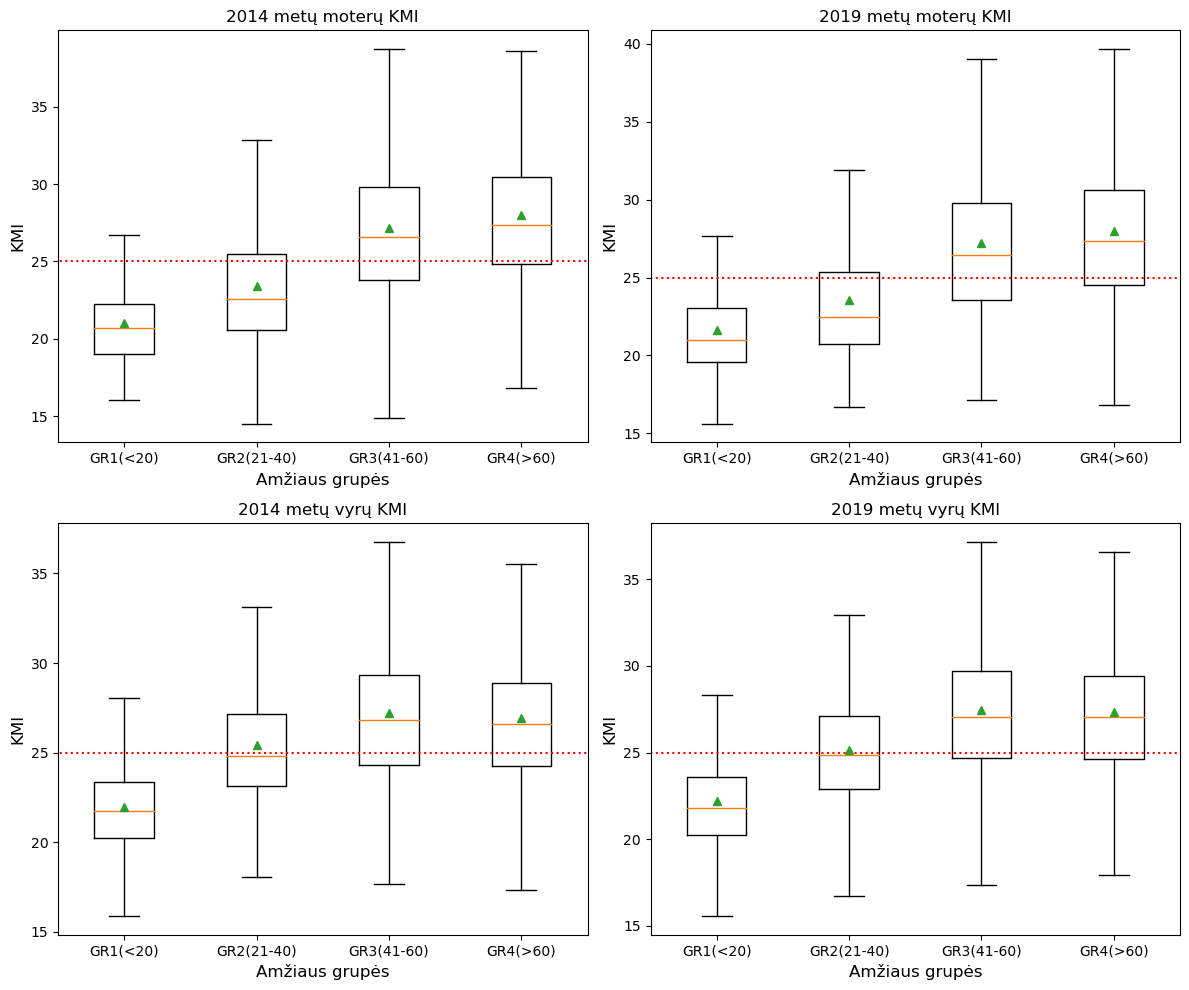

In [77]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

axes[0][0].boxplot([m14gr1, m14gr2, m14gr3, m14gr4], showmeans=True, showfliers=False) #burbuliukus nuemem, ju tik nerodo, bet i skaiciavimus ieina
axes[0][0].set_xticklabels(['GR1(<20)', 'GR2(21-40)', 'GR3(41-60)', 'GR4(>60)'])

axes[0][0].plot([0,5], [25,25], c='red', ls=':', label = 'viršvorio riba')
axes[0][0].set_xlim(0.5, 4.5)

axes[0][1].boxplot([m19gr1, m19gr2, m19gr3, m19gr4], showmeans=True, showfliers=False)
axes[0][1].set_xticklabels(['GR1(<20)', 'GR2(21-40)', 'GR3(41-60)', 'GR4(>60)'])

axes[0][1].plot([0,5], [25,25], c='red', ls=':', label = 'viršvorio riba')
axes[0][1].set_xlim(0.5, 4.5)

axes[1][0].boxplot([v14gr1, v14gr2, v14gr3, v14gr4], showmeans=True, showfliers=False) #burbuliukus nuemem, ju tik nerodo, bet i skaiciavimus ieina
axes[1][0].set_xticklabels(['GR1(<20)', 'GR2(21-40)', 'GR3(41-60)', 'GR4(>60)'])

axes[1][0].plot([0,5], [25,25], c='red', ls=':', label = 'viršvorio riba')
axes[1][0].set_xlim(0.5, 4.5)

axes[1][1].boxplot([v19gr1, v19gr2, v19gr3, v19gr4], showmeans=True, showfliers=False)
axes[1][1].set_xticklabels(['GR1(<20)', 'GR2(21-40)', 'GR3(41-60)', 'GR4(>60)'])

axes[1][1].plot([0,5], [25,25], c='red', ls=':', label = 'viršvorio riba')
axes[1][1].set_xlim(0.5, 4.5)

axes[0][0].set_xlabel('Amžiaus grupės', fontsize=12)
axes[0][0].set_ylabel('KMI', fontsize=12)
axes[0][0].set_title('2014 metų moterų KMI', fontsize=12)
axes[0][1].set_xlabel('Amžiaus grupės', fontsize=12)
axes[0][1].set_ylabel('KMI', fontsize=12)
axes[0][1].set_title('2019 metų moterų KMI', fontsize=12)

axes[1][0].set_xlabel('Amžiaus grupės', fontsize=12)
axes[1][0].set_ylabel('KMI', fontsize=12)
axes[1][0].set_title('2014 metų vyrų KMI', fontsize=12)
axes[1][1].set_xlabel('Amžiaus grupės', fontsize=12)
axes[1][1].set_ylabel('KMI', fontsize=12)
axes[1][1].set_title('2019 metų vyrų KMI', fontsize=12)

fig.tight_layout()
plt.show()

# GR1 iki 20m
# GR2 21-40
# GR3 41-60
# GR4 61-*

Ženklus KMI augimas grupėse nuo 40metų - galima spėti hormonų, sėslesnio, lėtesnio gyvenimo įtaka, mažesnis aktyvumas.

In [78]:
m214g1 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR1')]['pe7'].values # moteru 2014 aktyvumo sarasas
m214g2 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR2')]['pe7'].values
m214g3 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR3')]['pe7'].values
m214g4 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR4')]['pe7'].values

m219g1 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR1')]['pe7'].values # moteru 2014 aktyvumo sarasas
m219g2 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR2')]['pe7'].values
m219g3 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR3')]['pe7'].values
m219g4 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR4')]['pe7'].values

C:\Users\Apskaita\AppData\Local\Temp\ipykernel_19572\4269936324.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m219g1 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR1')]['pe7'].values # moteru 2014 aktyvumo sarasas
C:\Users\Apskaita\AppData\Local\Temp\ipykernel_19572\4269936324.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m219g2 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR2')]['pe7'].values
C:\Users\Apskaita\AppData\Local\Temp\ipykernel_19572\4269936324.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m219g3 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR3')]['pe7'].values
C:\Users\Apskaita\AppData\Local\Temp\ipykernel_19572\4269936324.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m219g4 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR4')]['pe7'].values


In [79]:
# neteisingu, minusiu verciu salinimas
m214gr1 = []
m214gr2 = []
m214gr3 = []
m214gr4 = []
for skaicius in m214g1:
    if skaicius>0 :
        m214gr1.append(skaicius)

for skaicius in m214g2:
    if skaicius>0 :
        m214gr2.append(skaicius)

for skaicius in m214g3:
    if skaicius>0 :
        m214gr3.append(skaicius)

for skaicius in m214g4:
    if skaicius>0 :
        m214gr4.append(skaicius)

m219gr1 = []
m219gr2 = []
m219gr3 = []
m219gr4 = []
for skaicius in m219g1:
    if skaicius>0 :
        m219gr1.append(skaicius)

for skaicius in m219g2:
    if skaicius>0 :
        m219gr2.append(skaicius)

for skaicius in m219g3:
    if skaicius>0 :
        m219gr3.append(skaicius)

for skaicius in m219g4:
    if skaicius>0 :
        m219gr4.append(skaicius)

In [80]:
v214g1 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR1')]['pe7'].values # moteru 2014 aktyvumo sarasas
v214g2 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR2')]['pe7'].values
v214g3 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR3')]['pe7'].values
v214g4 = stat14[(stat14['sex'] == 2) & (stat14['Grupe'] == 'GR4')]['pe7'].values

v219g1 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR1')]['pe7'].values # moteru 2014 aktyvumo sarasas
v219g2 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR2')]['pe7'].values
v219g3 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR3')]['pe7'].values
v219g4 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR4')]['pe7'].values

C:\Users\Apskaita\AppData\Local\Temp\ipykernel_19572\2954986916.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v219g1 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR1')]['pe7'].values # moteru 2014 aktyvumo sarasas
C:\Users\Apskaita\AppData\Local\Temp\ipykernel_19572\2954986916.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v219g2 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR2')]['pe7'].values
C:\Users\Apskaita\AppData\Local\Temp\ipykernel_19572\2954986916.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v219g3 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR3')]['pe7'].values
C:\Users\Apskaita\AppData\Local\Temp\ipykernel_19572\2954986916.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v219g4 = stat19[(stat19['sex'] == 2) & (stat14['Grupe'] == 'GR4')]['pe7'].values


In [81]:
# neteisingu, minusiu verciu salinimas
v214gr1 = []
v214gr2 = []
v214gr3 = []
v214gr4 = []
for skaicius in v214g1:
    if skaicius>0 :
        v214gr1.append(skaicius)

for skaicius in v214g2:
    if skaicius>0 :
        v214gr2.append(skaicius)

for skaicius in v214g3:
    if skaicius>0 :
        v214gr3.append(skaicius)

for skaicius in v214g4:
    if skaicius>0 :
        v214gr4.append(skaicius)

v219gr1 = []
v219gr2 = []
v219gr3 = []
v219gr4 = []
for skaicius in v219g1:
    if skaicius>0 :
        v219gr1.append(skaicius)

for skaicius in v219g2:
    if skaicius>0 :
        v219gr2.append(skaicius)

for skaicius in v219g3:
    if skaicius>0 :
        v219gr3.append(skaicius)

for skaicius in v219g4:
    if skaicius>0 :
        v219gr4.append(skaicius)

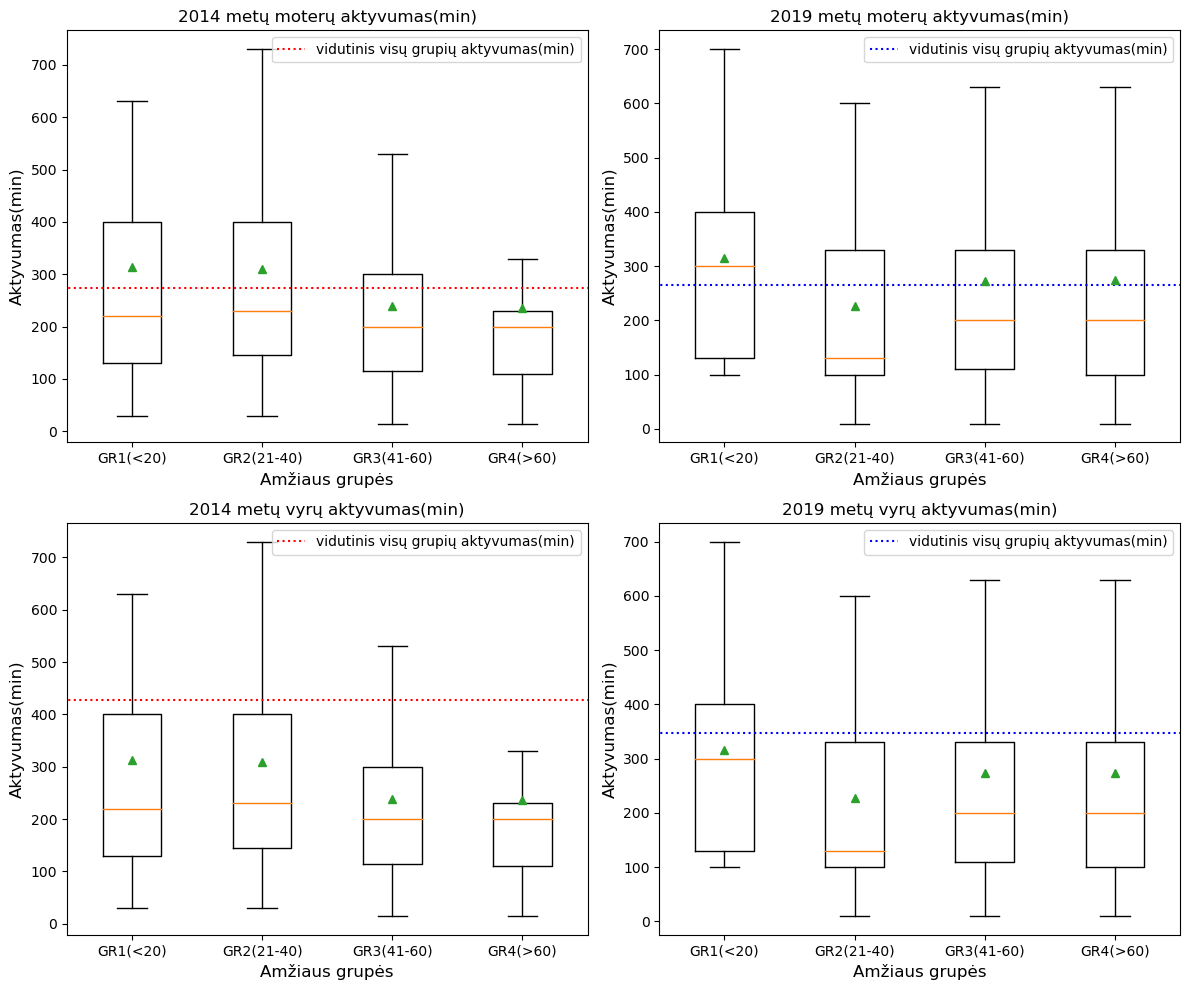

In [82]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

axes[0][0].boxplot([m214gr1, m214gr2, m214gr3, m214gr4], showmeans=True, showfliers=False) #burbuliukus nuemem, ju tik nerodo, bet i skaiciavimus ieina
axes[0][0].set_xticklabels(['GR1(<20)', 'GR2(21-40)', 'GR3(41-60)', 'GR4(>60)'])

axes[0][0].plot([0,5], [274,274], c='red', ls=':', label = 'vidutinis visų grupių aktyvumas(min)')
axes[0][0].set_xlim(0.5, 4.5)
axes[0][0].legend()

axes[0][1].boxplot([m219gr1, m219gr2, m219gr3, m219gr4], showmeans=True, showfliers=False)
axes[0][1].set_xticklabels(['GR1(<20)', 'GR2(21-40)', 'GR3(41-60)', 'GR4(>60)'])

axes[0][1].plot([0,5], [266,266], c='blue', ls=':', label = 'vidutinis visų grupių aktyvumas(min)')
axes[0][1].set_xlim(0.5, 4.5)
axes[0][1].legend()

axes[1][0].boxplot([v214gr1, v214gr2, v214gr3, v214gr4], showmeans=True, showfliers=False) #burbuliukus nuemem, ju tik nerodo, bet i skaiciavimus ieina
axes[1][0].set_xticklabels(['GR1(<20)', 'GR2(21-40)', 'GR3(41-60)', 'GR4(>60)'])

axes[1][0].plot([0,5], [428,428], c='red', ls=':', label = 'vidutinis visų grupių aktyvumas(min)')
axes[1][0].set_xlim(0.5, 4.5)
axes[1][0].legend()

axes[1][1].boxplot([v219gr1, v219gr2, v219gr3, v219gr4], showmeans=True, showfliers=False)
axes[1][1].set_xticklabels(['GR1(<20)', 'GR2(21-40)', 'GR3(41-60)', 'GR4(>60)'])

axes[1][1].plot([0,5], [347,347], c='blue', ls=':', label = 'vidutinis visų grupių aktyvumas(min)')
axes[1][1].set_xlim(0.5, 4.5)
axes[1][1].legend()

axes[0][0].set_xlabel('Amžiaus grupės', fontsize=12)
axes[0][0].set_ylabel('Aktyvumas(min)', fontsize=12)
axes[0][0].set_title('2014 metų moterų aktyvumas(min)', fontsize=12)
axes[0][1].set_xlabel('Amžiaus grupės', fontsize=12)
axes[0][1].set_ylabel('Aktyvumas(min)', fontsize=12)
axes[0][1].set_title('2019 metų moterų aktyvumas(min)', fontsize=12)

axes[1][0].set_xlabel('Amžiaus grupės', fontsize=12)
axes[1][0].set_ylabel('Aktyvumas(min)', fontsize=12)
axes[1][0].set_title('2014 metų vyrų aktyvumas(min)', fontsize=12)
axes[1][1].set_xlabel('Amžiaus grupės', fontsize=12)
axes[1][1].set_ylabel('Aktyvumas(min)', fontsize=12)
axes[1][1].set_title('2019 metų vyrų aktyvumas(min)', fontsize=12)

fig.tight_layout()
plt.show()

2019 metais pastebimas vyresnio amžiaus grupių (GR3 ir GR4) aktyvumo padidėjimas, tačiau krito G2(21-40m) grupės aktyvumas.